In [ ]:
!nvidia-smi

Mon Feb 26 02:35:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 147 (delta 16), reused 14 (delta 14), pack-reused 122
Receiving objects: 100% (147/147), 607.60 KiB | 2.36 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
%cd yolov9

/content/yolov9


In [ ]:
!pip install -r requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!pip install roboflow

In [ ]:
%cd yolov9

[Errno 2] No such file or directory: 'yolov9'
/content/yolov9


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxxxxxxxxx")
project = rf.workspace("aomsin-pvpaz").project("-vi0h8")
dataset = project.version(1).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ไฝธรรมดากับไฝมะเร็ง-1 in yolov7pytorch:: 100%|██████████| 180/180 [00:00<00:00, 7432.02it/s]


change inside data.yaml:
```
names:
- Melanoma
- normalmold
nc: 2
roboflow:
  license: CC BY 4.0
  project: -vi0h8
  url: https://universe.roboflow.com/aomsin-pvpaz/-vi0h8/dataset/1
  version: 1
  workspace: aomsin-pvpaz
test: /content/yolov9/ไฝธรรมดากับไฝมะเร็ง-1/test/images
train: /content/yolov9/ไฝธรรมดากับไฝมะเร็ง-1/train/images
val: /content/yolov9/ไฝธรรมดากับไฝมะเร็ง-1/train/images
```




In [ ]:
!python train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/ไฝธรรมดากับไฝมะเร็ง-1/data.yaml \
--weights /content/yolov9/{HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2024-02-26 02:46:30.614455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 02:46:30.614513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 02:46:30.616366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 02:46:31.895258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/{HOME}/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/ไฝธรรมดากับไฝมะเร็ง-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=

In [ ]:
!python train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/ไฝธรรมดากับไฝมะเร็ง-1/data.yaml \
--weights /content/yolov9/{HOME}/weights/yolov9-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2024-02-26 02:54:26.092555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 02:54:26.092602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 02:54:26.093914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 02:54:27.104460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/{HOME}/weights/yolov9-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/ไฝธรรมดากับไฝมะเร็ง-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave

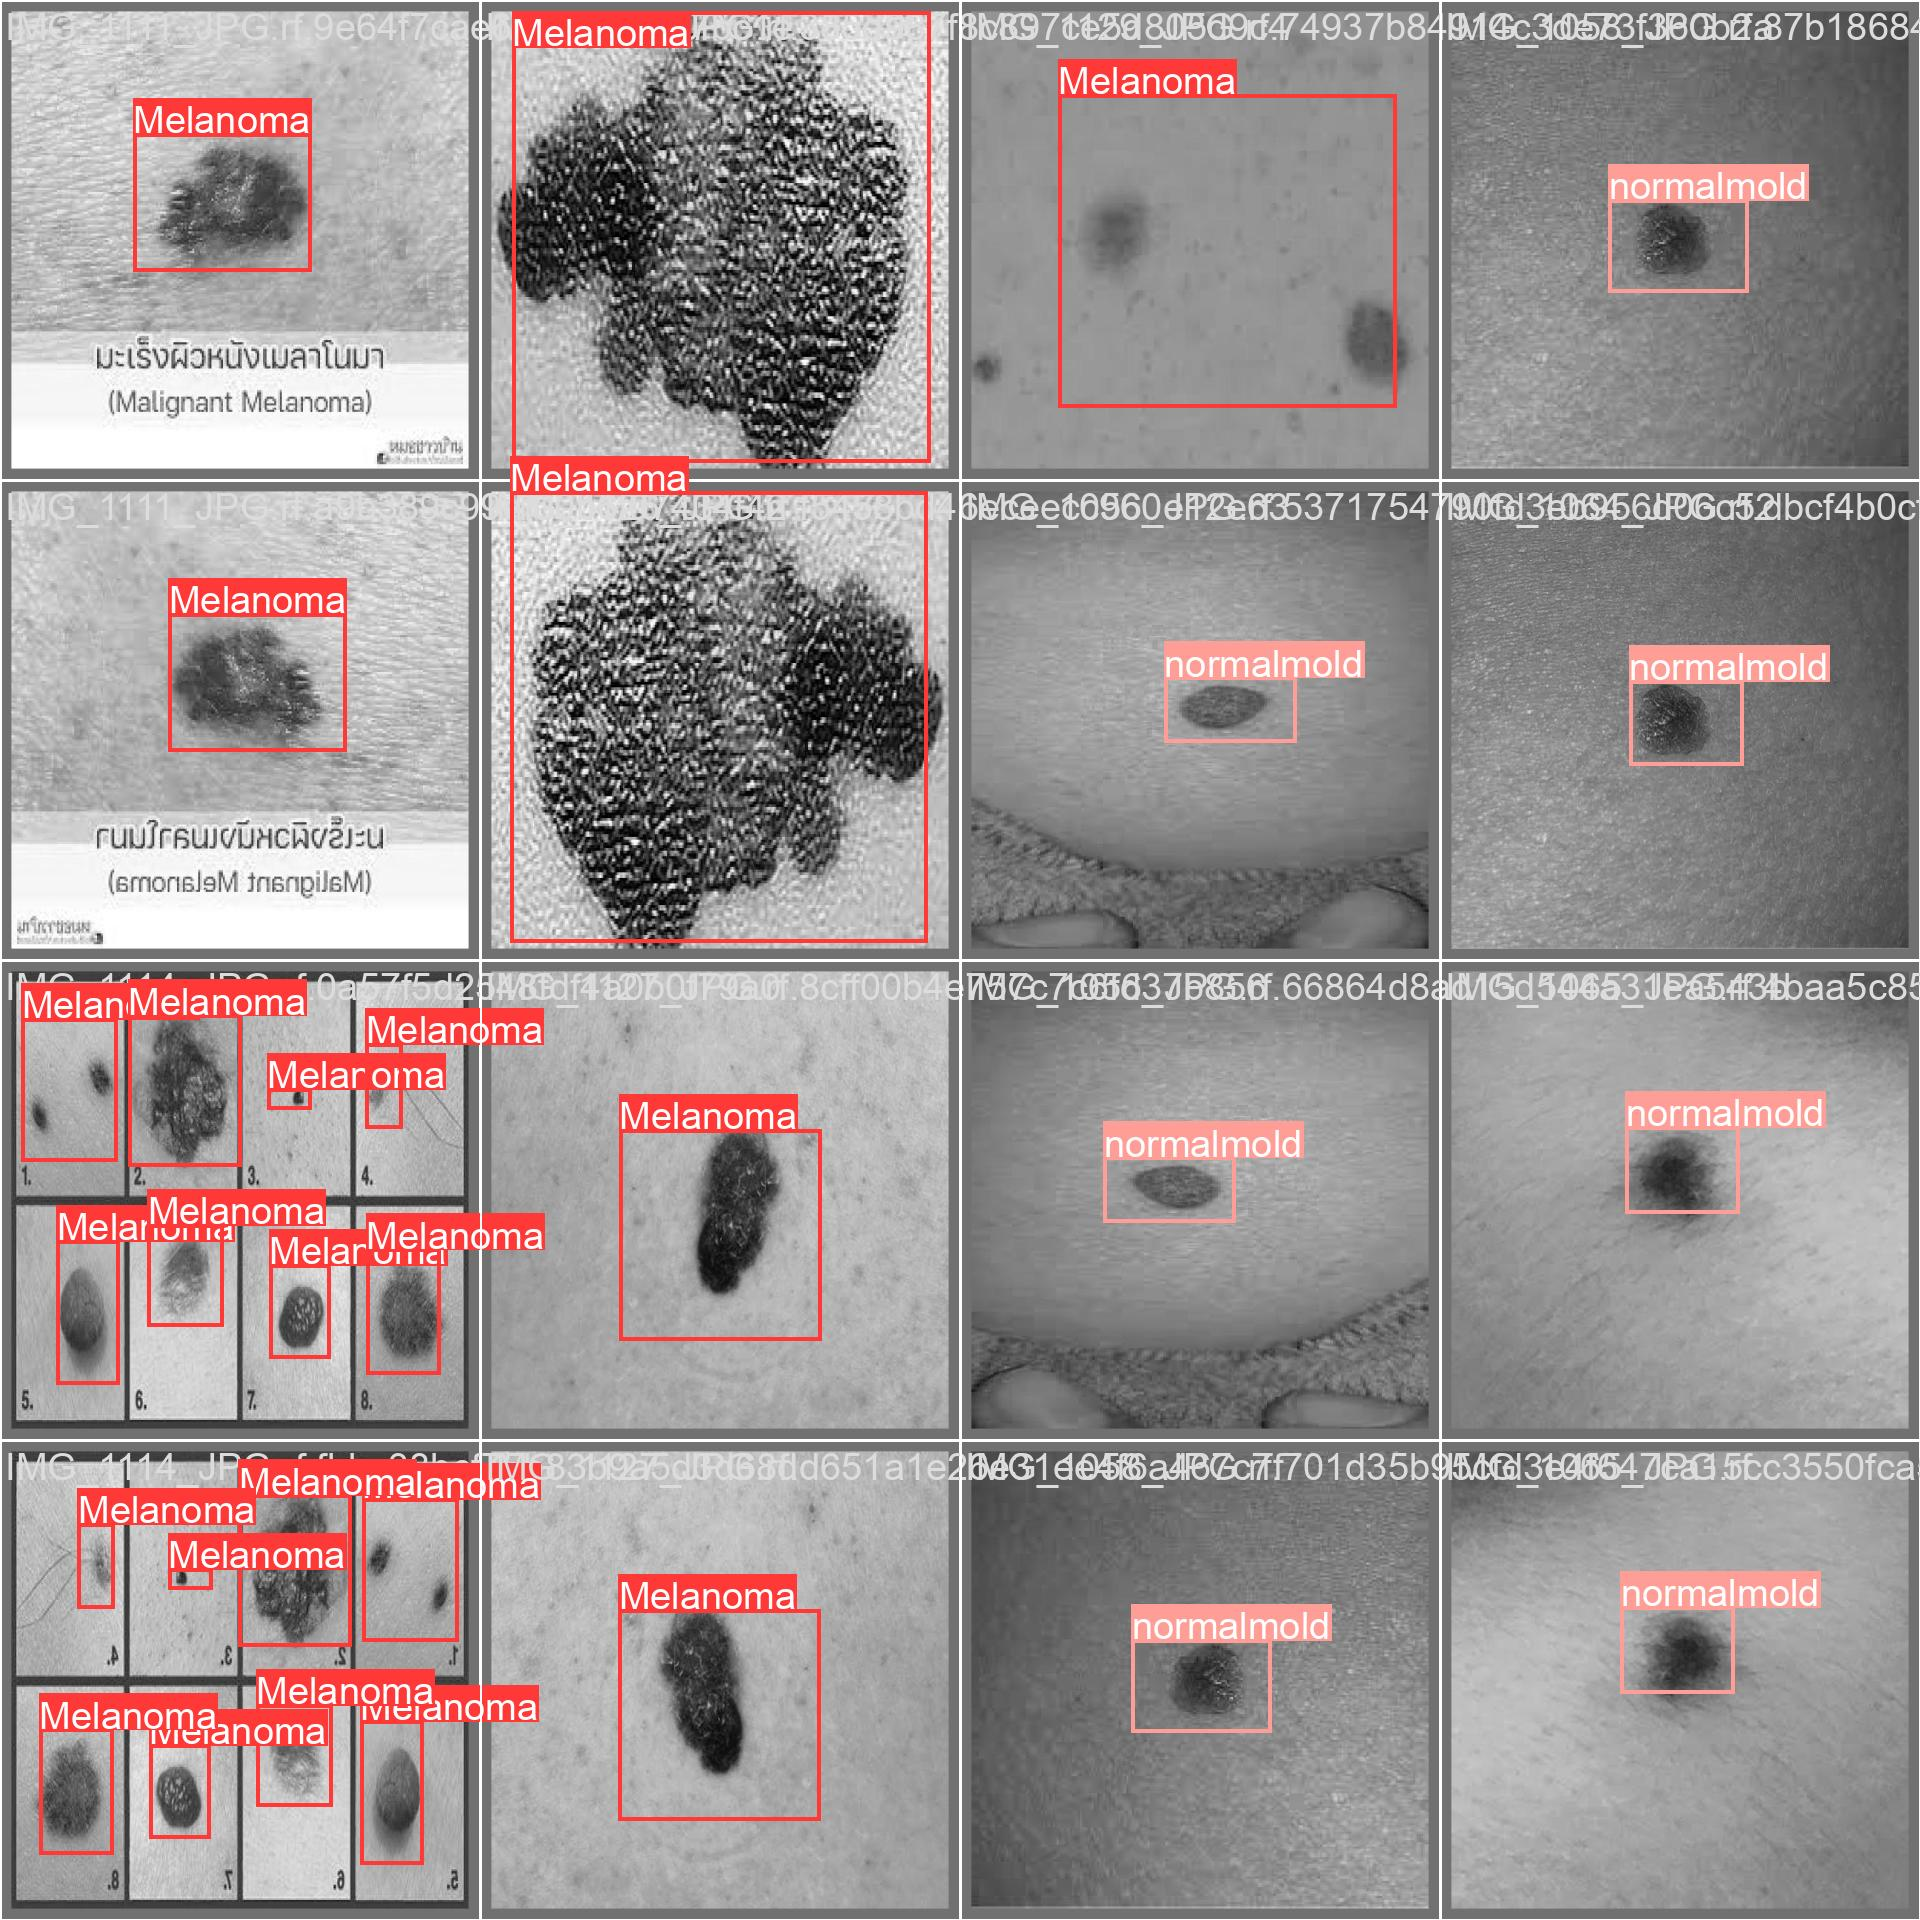

In [ ]:
from IPython.display import Image
Image(filename="/content/yolov9/runs/train/exp/val_batch0_labels.jpg") #Gelan-c Label

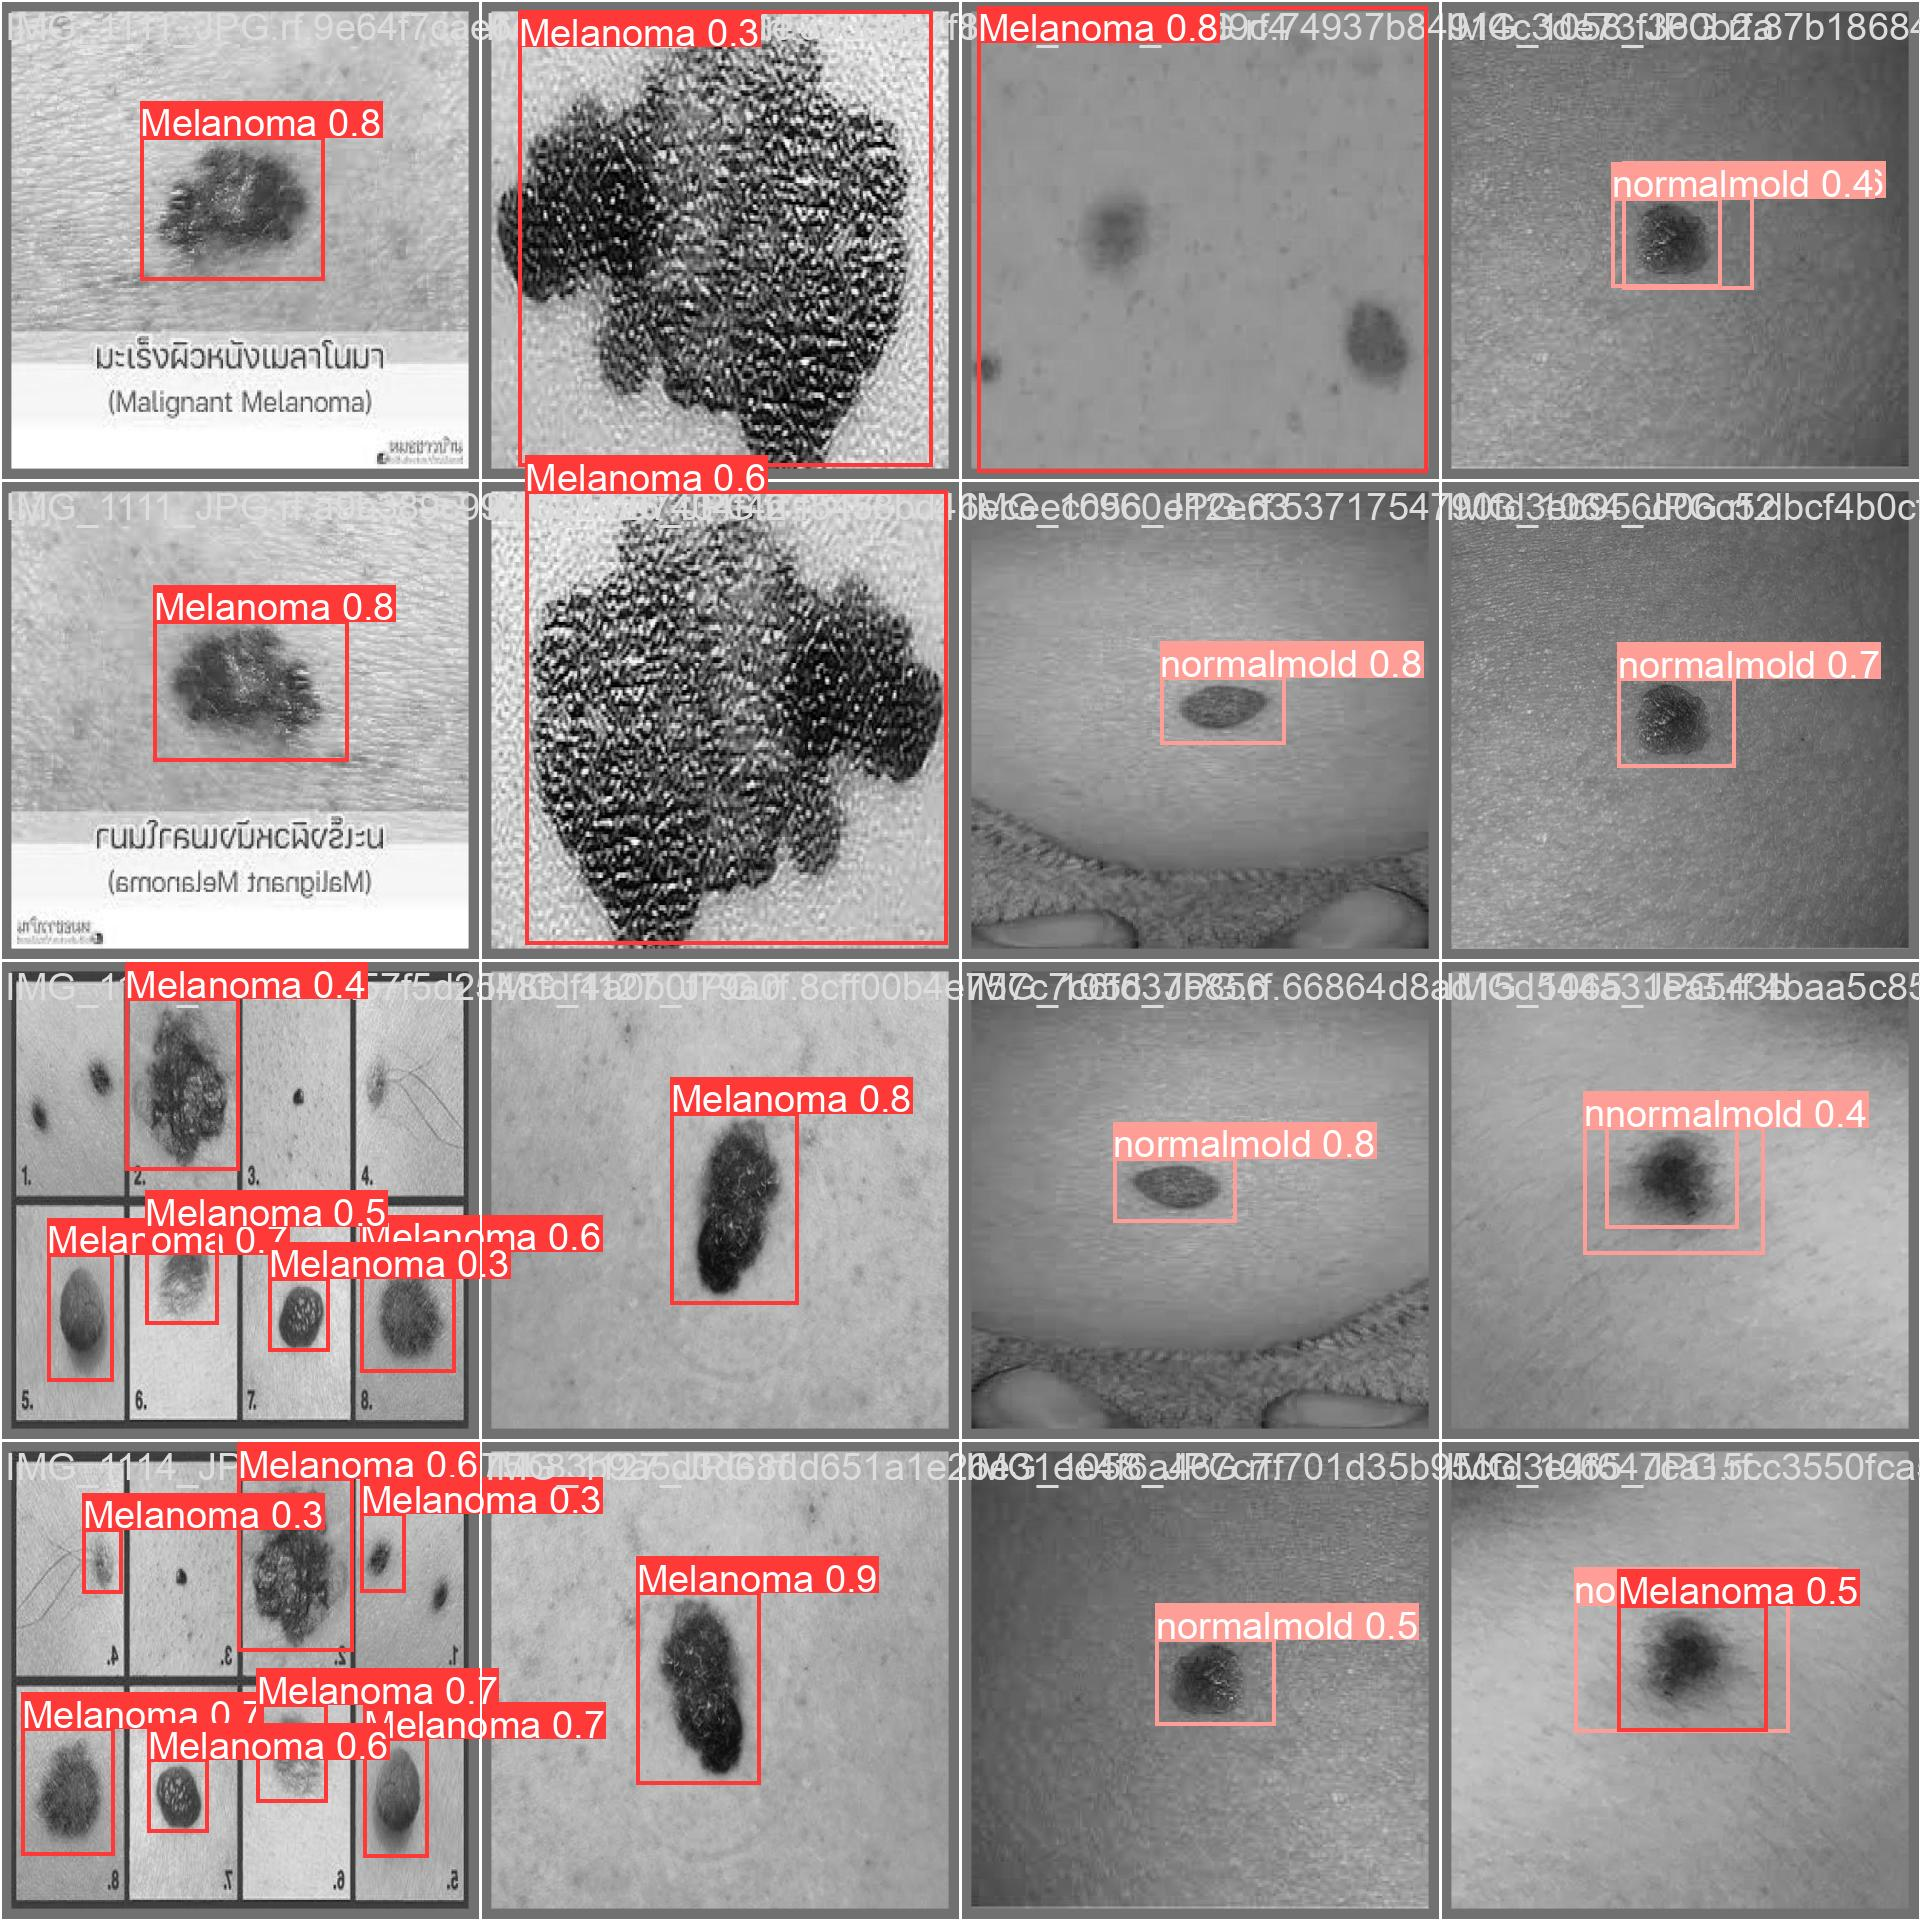

In [ ]:
Image(filename="/content/yolov9/runs/train/exp/val_batch0_pred.jpg") #Gelan-c Prediction

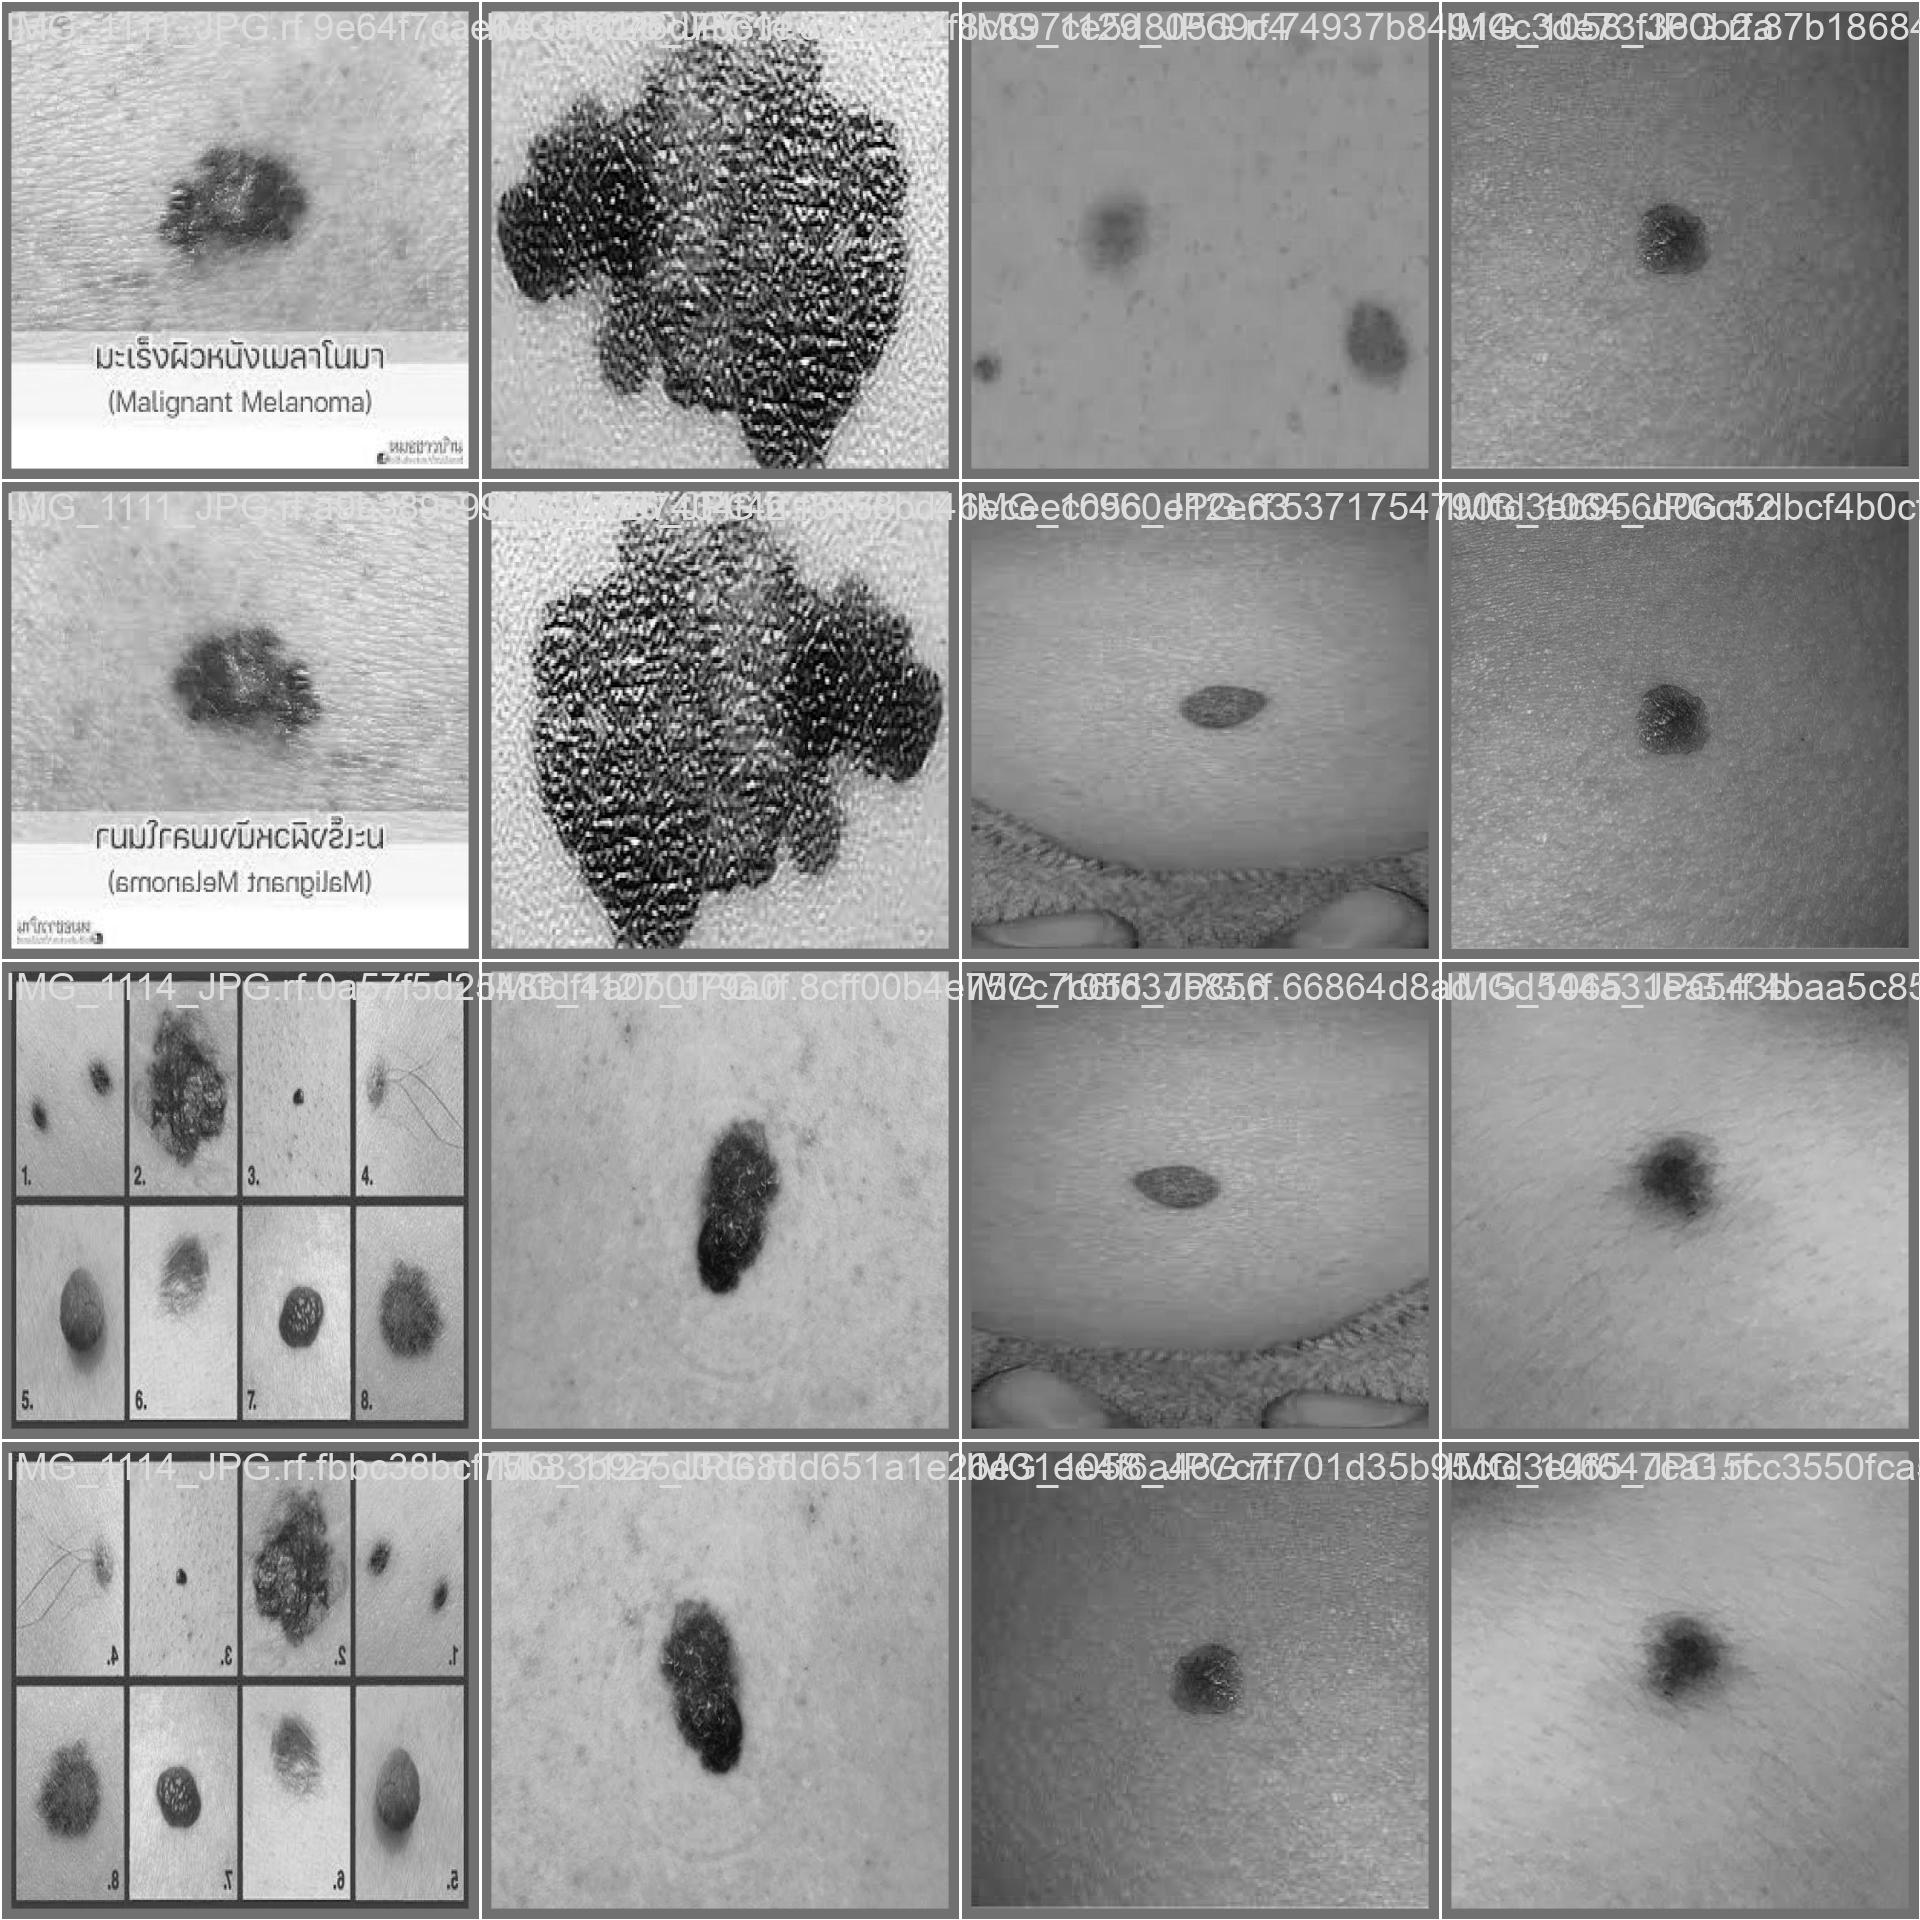

In [ ]:
sImage(filename="/content/yolov9/runs/train/exp2/val_batch0_pred.jpg") #Yolov9-c=